In [1]:
temp = read.csv("Temperature.csv",header=T)
rain  = read.csv("Precipitation.csv",header=T)
river = read.csv("RiverFlow.csv",header=F)

In [2]:
#Fill in missing value in rain for October, 1964
#using the average between September and November
rain[,11]=as.numeric(rain[,11])
rain[14,11]=0.5*(as.numeric(rain[14,10])+as.numeric(rain[14,12]))
rain[,11]=as.factor(rain[,11])

In [3]:
## All variables for the same time period
temp = as.vector(t(temp[,-1]))
temp = temp[-c(1:(12*6))]
temp = temp[-c(736:744)]
rain = as.vector(t(rain[,-1]))
rain = rain[-c(1:(12*6))]
rain = rain[-c(736:744)]
river = as.vector(river[,3])

temp.ts = ts(as.numeric(temp),start=1956, freq=12)
rain.ts = ts(as.numeric(rain),start=1956, freq=12)
river.ts = ts(as.numeric(river),start=1956, freq=12)

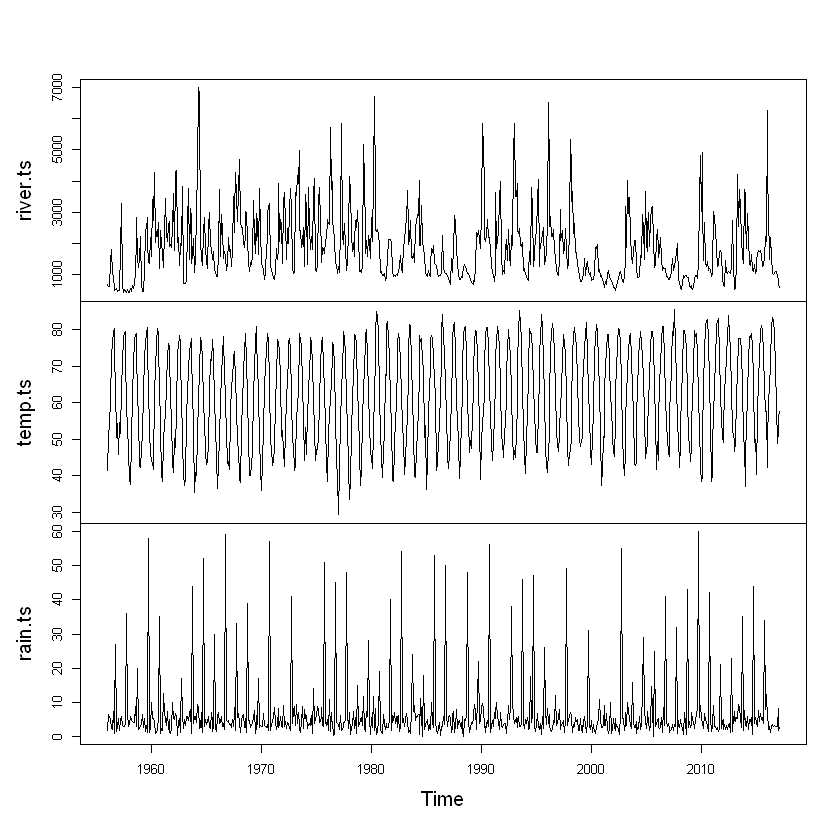

In [4]:
data.ts = ts.union(river.ts,temp.ts,rain.ts)
plot(data.ts, type="l",main="")

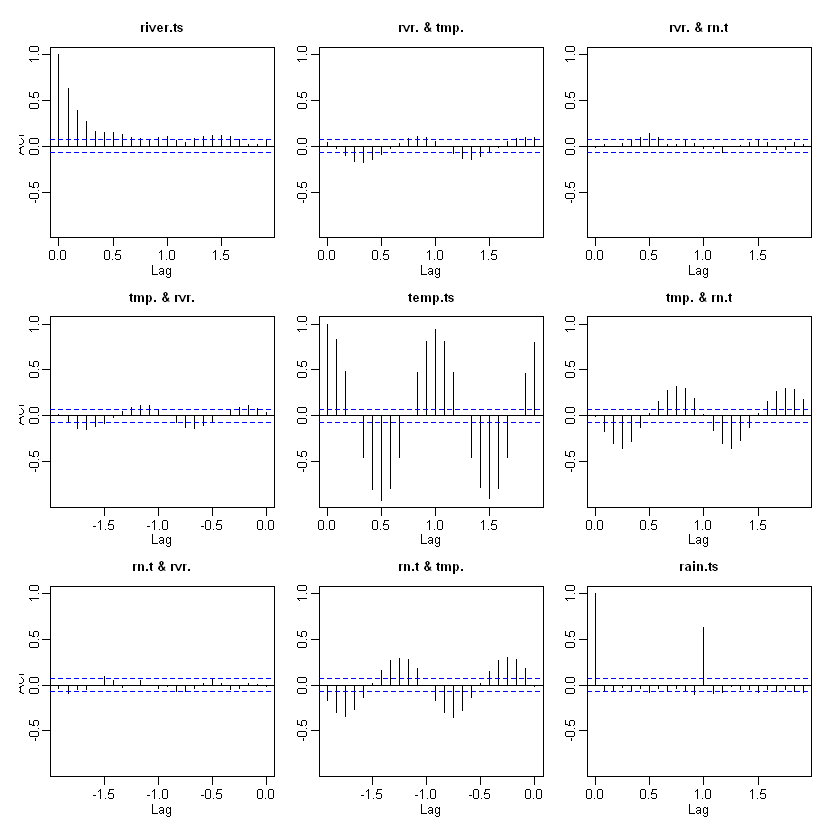

In [5]:
acf(data.ts)

No significant lead-lag relationship in river flow vs the 2 other time series. temp.ts and rain.ts show high seasonality.

In [21]:
library(tseries)
adf.test(river.ts, alternative = "stationary")
adf.test(rain.ts, alternative = "stationary")
adf.test(temp.ts, alternative = "stationary")

Warning message in adf.test(river.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  river.ts
Dickey-Fuller = -6.9666, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(rain.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  rain.ts
Dickey-Fuller = -13.47, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(temp.ts, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  temp.ts
Dickey-Fuller = -8.7844, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


We have stationarity.

In [7]:
library(forecast)
#Determine differencing order to achieve stationarity 
ndiffs(river.ts, alpha = 0.05, test = c("adf"))
ndiffs(rain.ts, alpha = 0.05, test = c("adf"))
ndiffs(temp.ts, alpha = 0.05, test = c("adf"))

Warning message:
"package 'forecast' was built under R version 3.6.3"

[1] 0

[1] 0

[1] 0

Hence differencing is not required.(?)

# DO ARIMAX!

# DO VARX!